In [73]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [74]:
df = pd.read_csv(r"C:\Users\MayankKoundal\Documents\Datasets\Moodys.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')



In [75]:
df.set_index ('Date', inplace = True) 

In [76]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-11-01,8.312500,8.312500,8.187500,8.250000,6.565471,2176400
1994-11-02,8.250000,8.250000,8.187500,8.187500,6.515731,2348200
1994-11-03,8.187500,8.250000,8.125000,8.187500,6.515731,2060800
1994-11-04,8.187500,8.250000,8.125000,8.125000,6.465993,2663800
1994-11-07,8.062500,8.062500,8.000000,8.062500,6.416255,1049400
...,...,...,...,...,...,...
2023-04-04,305.970001,310.290009,302.390015,303.940002,303.940002,743400
2023-04-05,303.230011,304.040009,300.279999,302.850006,302.850006,584200
2023-04-06,302.019989,302.839996,296.160004,298.619995,298.619995,564500


In [77]:
df.isna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-11-01,False,False,False,False,False,False
1994-11-02,False,False,False,False,False,False
1994-11-03,False,False,False,False,False,False
1994-11-04,False,False,False,False,False,False
1994-11-07,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-04-04,False,False,False,False,False,False
2023-04-05,False,False,False,False,False,False
2023-04-06,False,False,False,False,False,False


In [78]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [79]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [80]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [81]:


df.index[0].day_name()


'Tuesday'

In [82]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [83]:
#df['day'] = df['Date'].dt.day_name()

df['day'] = df.index.day_name()


In [93]:
df

,Open,High,Low,Close,Adj Close,Volume,day
Date,,,,,,,
1994-11-01,8.312500,8.312500,8.187500,8.250000,6.565471,2176400,Tuesday
1994-11-02,8.250000,8.250000,8.187500,8.187500,6.515731,2348200,Wednesday
1994-11-03,8.187500,8.250000,8.125000,8.187500,6.515731,2060800,Thursday
1994-11-04,8.187500,8.250000,8.125000,8.125000,6.465993,2663800,Friday
1994-11-07,8.062500,8.062500,8.000000,8.062500,6.416255,1049400,Monday
...,...,...,...,...,...,...,...
2023-04-04,305.970001,310.290009,302.390015,303.940002,303.940002,743400,Tuesday
2023-04-05,303.230011,304.040009,300.279999,302.850006,302.850006,584200,Wednesday
2023-04-06,302.019989,302.839996,296.160004,298.619995,298.619995,564500,Thursday


In [85]:
df.index.min()

Timestamp('1994-11-01 00:00:00')

In [86]:
df.index.max()

Timestamp('2023-04-11 00:00:00')

In [87]:
#df['Date'].max() - df['Date'].min()

date_range = df.index.max() - df.index.min()


In [88]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7.160000e+03
mean,81.428708,82.325171,80.543896,81.459335,76.262965,1.728320e+06
std,94.101423,95.075305,93.090423,94.096398,93.727654,1.826720e+06
min,6.937500,7.000000,6.875000,6.937500,5.520961,0.000000e+00
25%,17.923749,18.178750,17.625000,17.963750,14.478568,7.618000e+05
50%,38.615000,39.205000,38.094999,38.645001,32.791308,1.154750e+06
75%,100.977501,101.860001,100.139997,101.082500,94.003287,2.010800e+06
max,407.410004,407.940002,400.299988,406.690002,401.238342,4.354560e+07


In [89]:
#mask = (df['Date'] < '1995-03-03')
#df[mask]

df['1994' :'1995']['Close']

Date
1994-11-01    8.2500
1994-11-02    8.1875
1994-11-03    8.1875
1994-11-04    8.1250
1994-11-07    8.0625
               ...  
1995-12-22    8.9375
1995-12-26    9.0000
1995-12-27    9.0625
1995-12-28    9.1250
1995-12-29    9.1875
Name: Close, Length: 294, dtype: float64

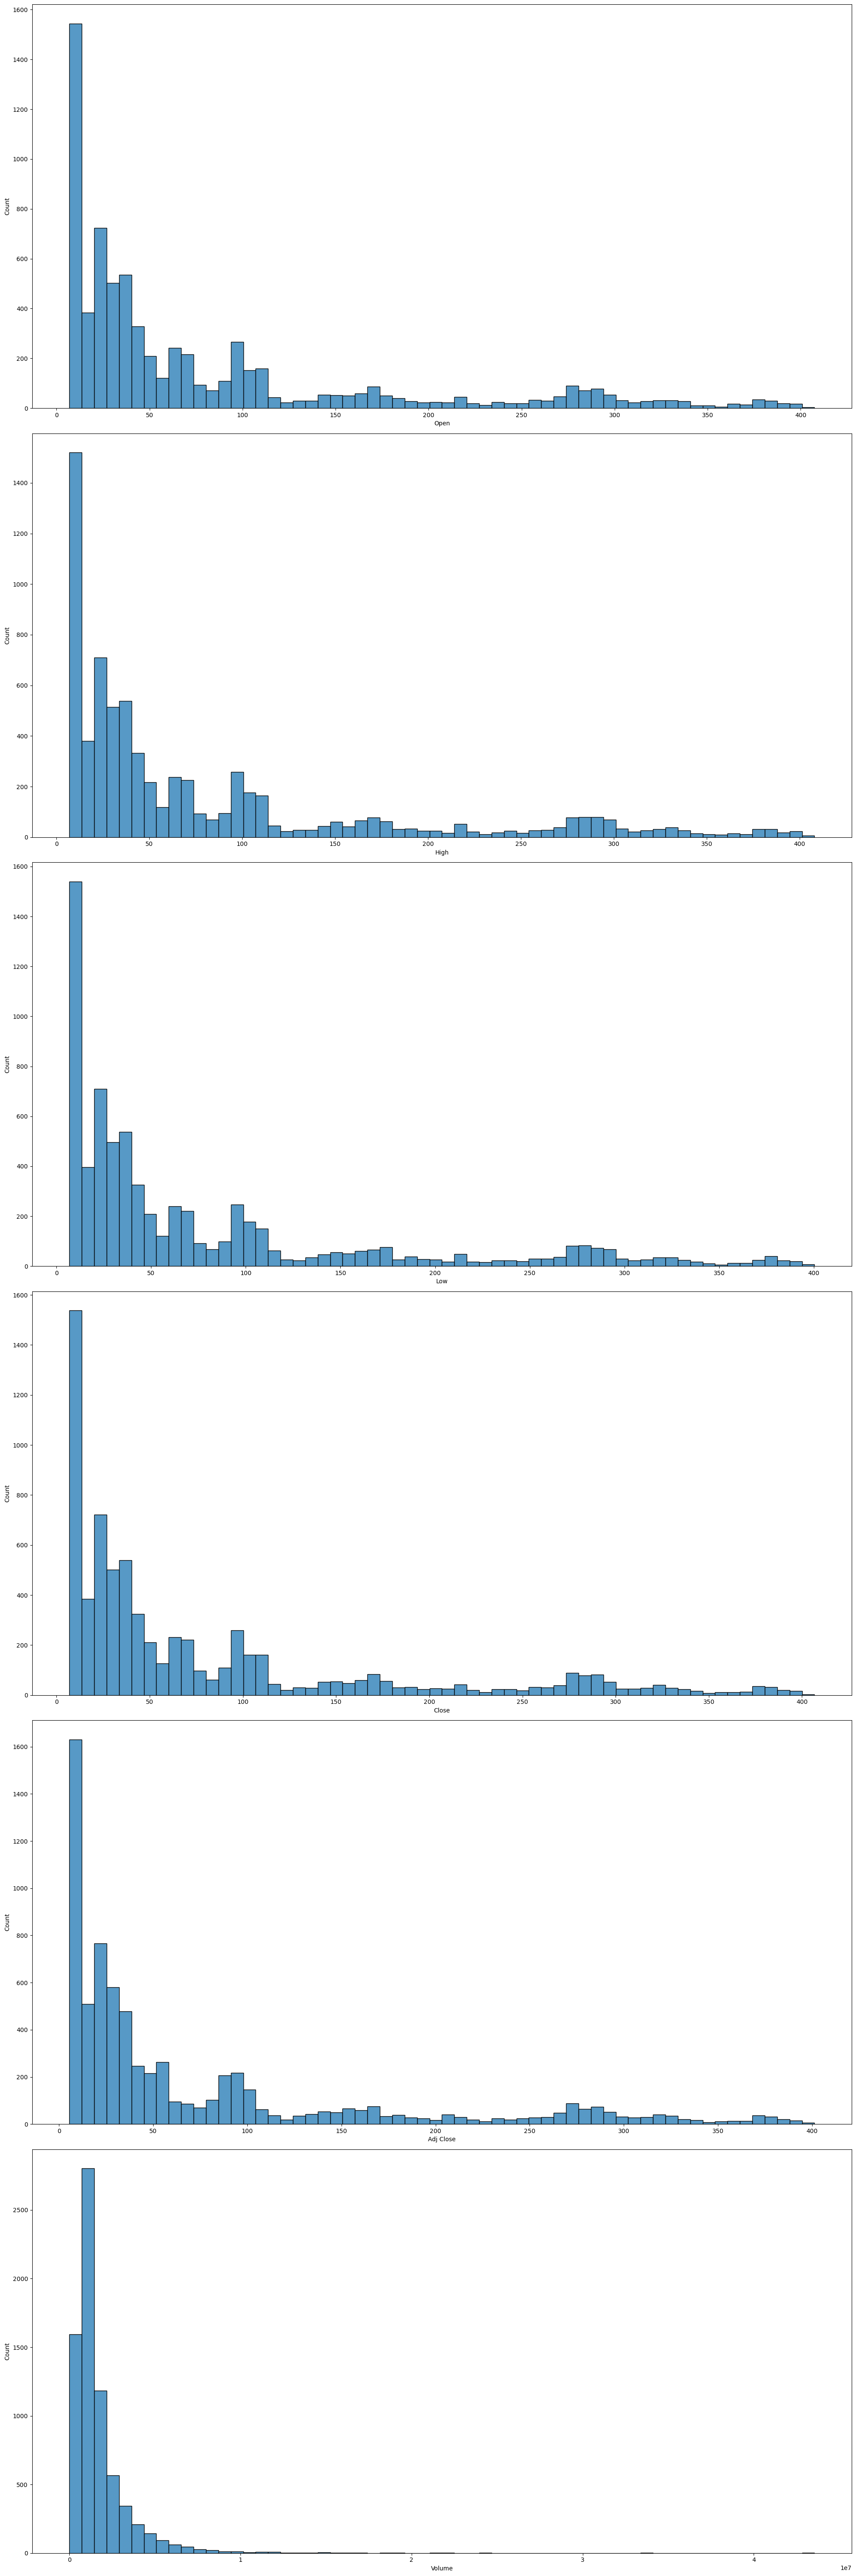

In [90]:


# Get numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(20, 10 * len(numeric_columns)))

# Plot histograms using seaborn
for idx, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, bins=60, ax=axes[idx])

plt.tight_layout()
plt.show()


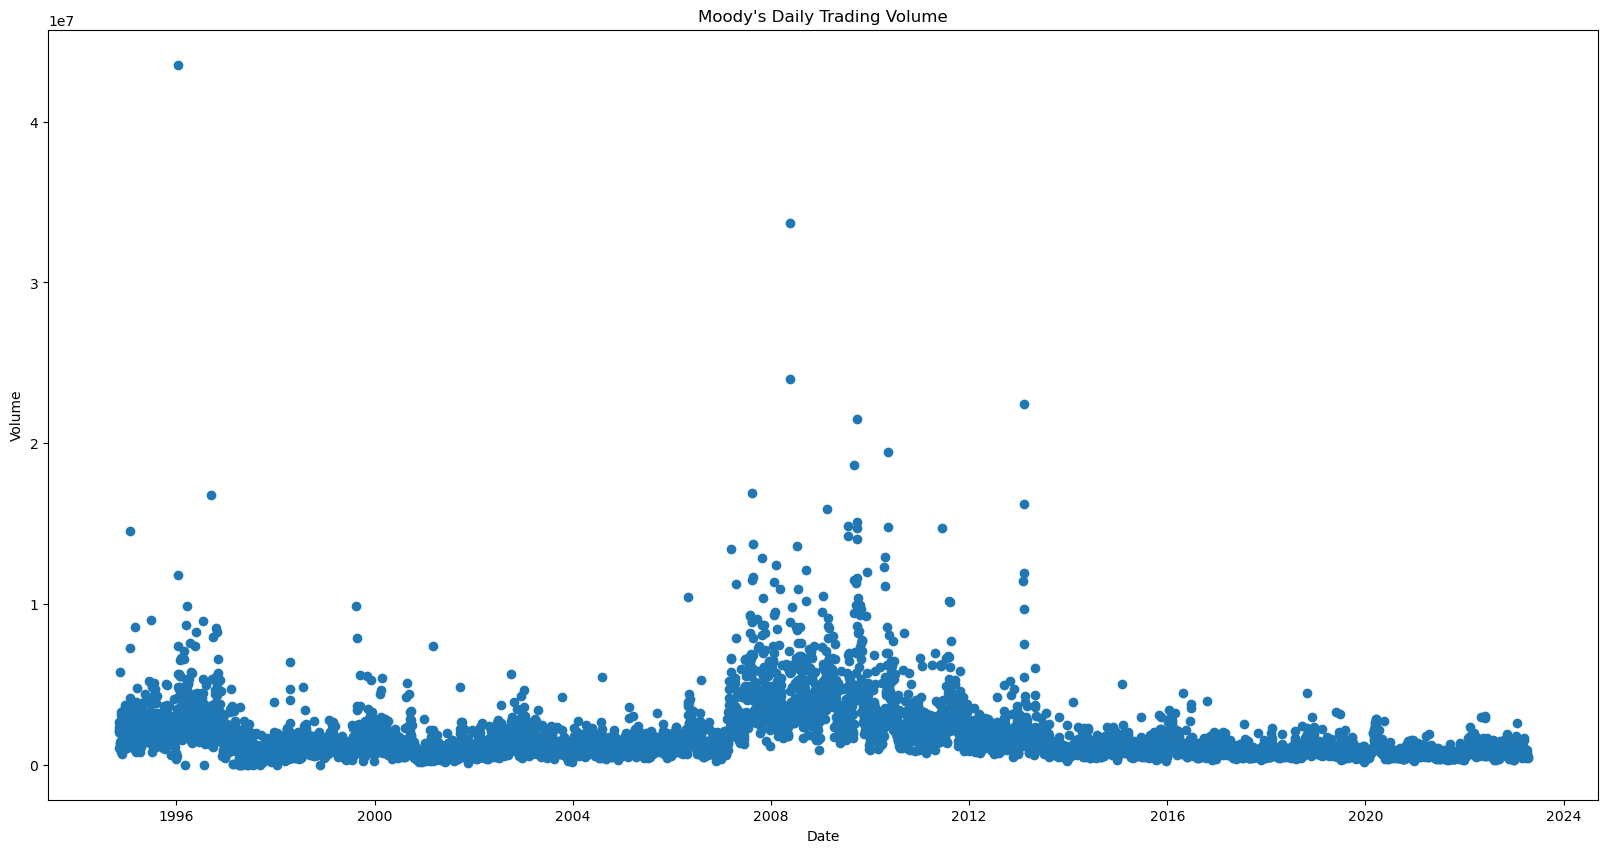

In [96]:
plt.figure(figsize=(20, 10))
plt.scatter(df.index, df['Volume'])
plt.title('Moody\'s Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()



<Axes: >

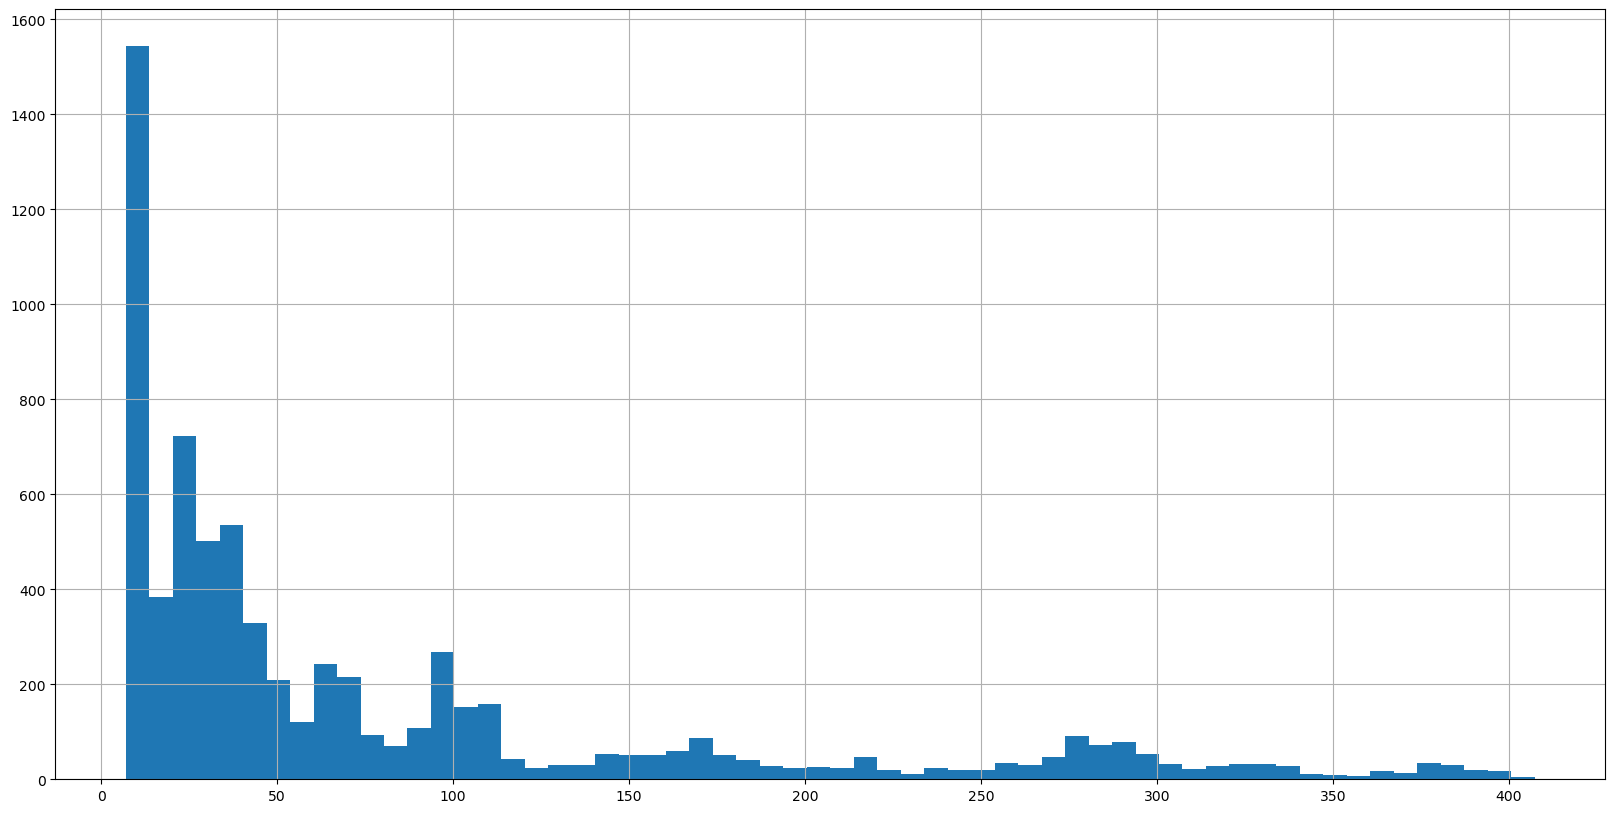

In [97]:
df['Open'].hist(bins=60 , figsize = (20,10))

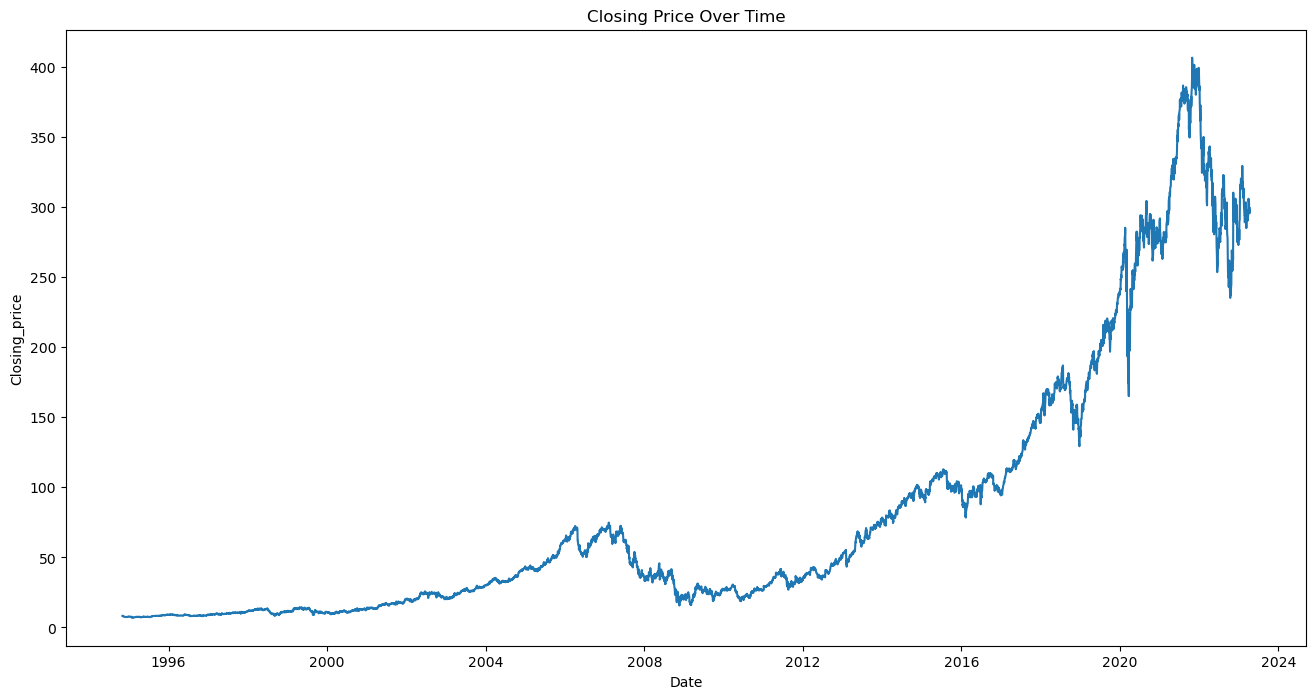

In [98]:
plt.figure(figsize=(16,8))
plt.title('Closing Price Over Time')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing_price')
plt.show()

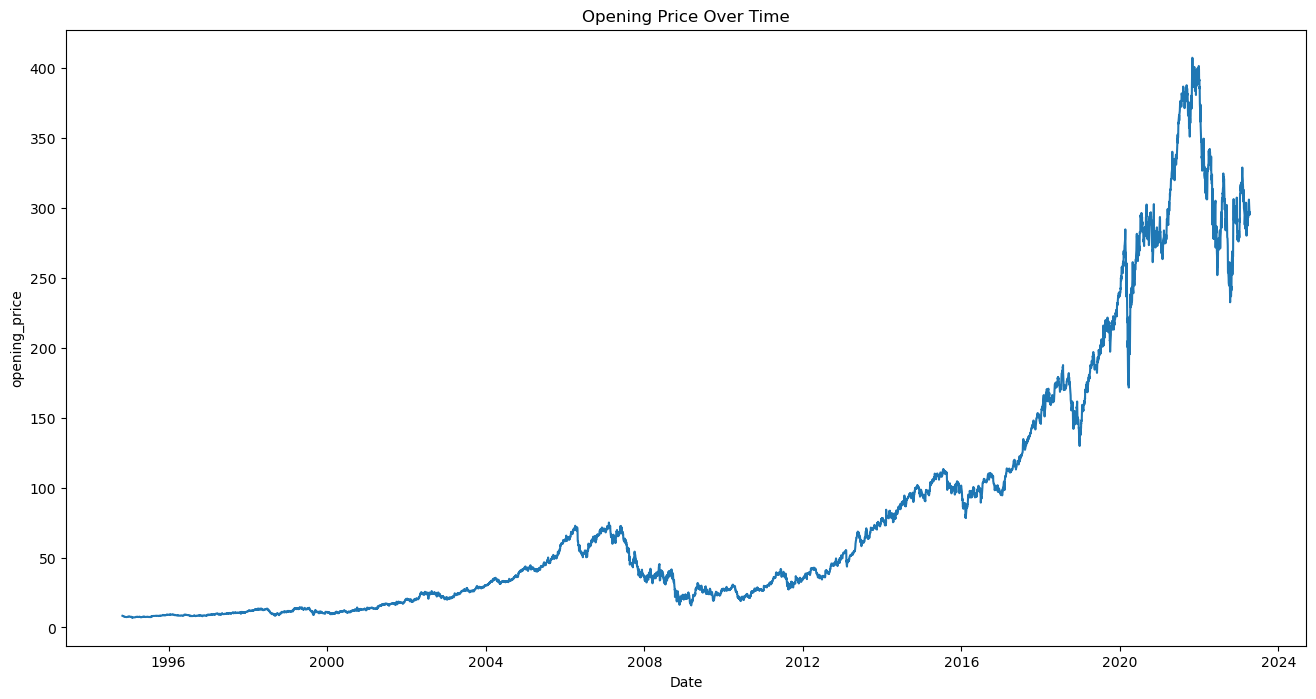

In [99]:
plt.figure(figsize=(16,8))
plt.title('Opening Price Over Time')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('opening_price')
plt.show()

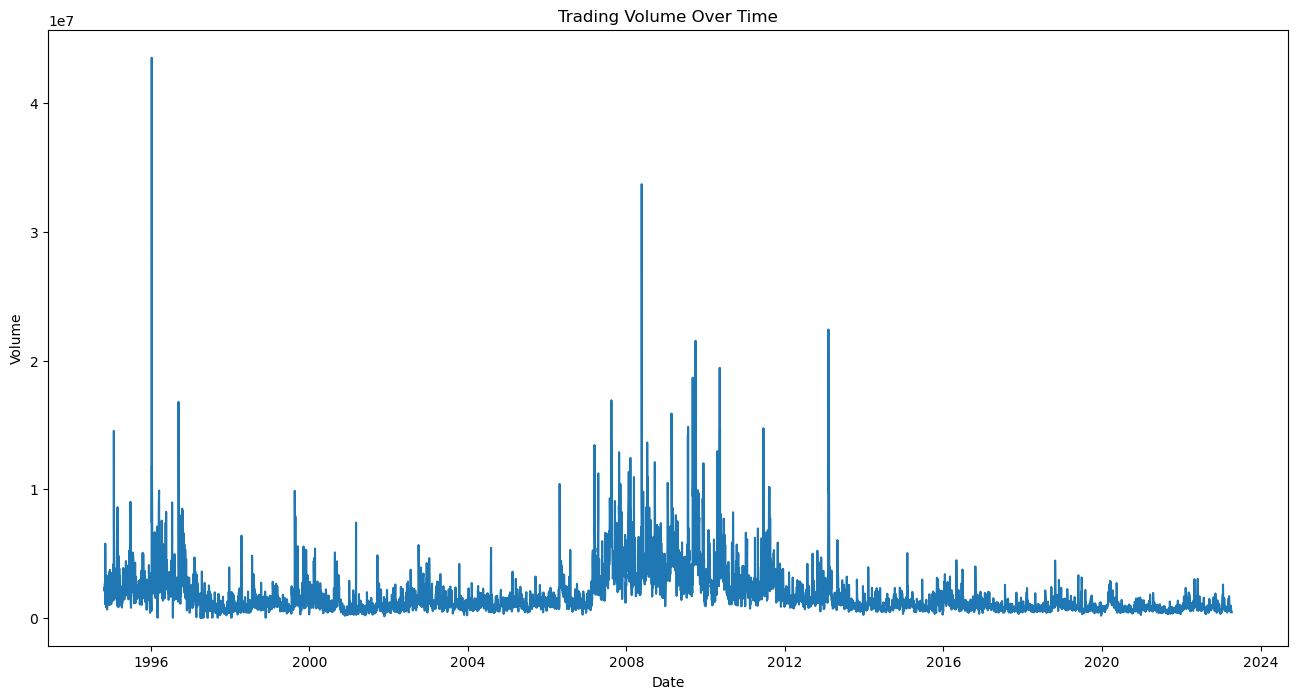

In [100]:
plt.figure(figsize=(16,8))
plt.title('Trading Volume Over Time')
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [101]:
df['Daily_Return'] = df['Close'].pct_change()


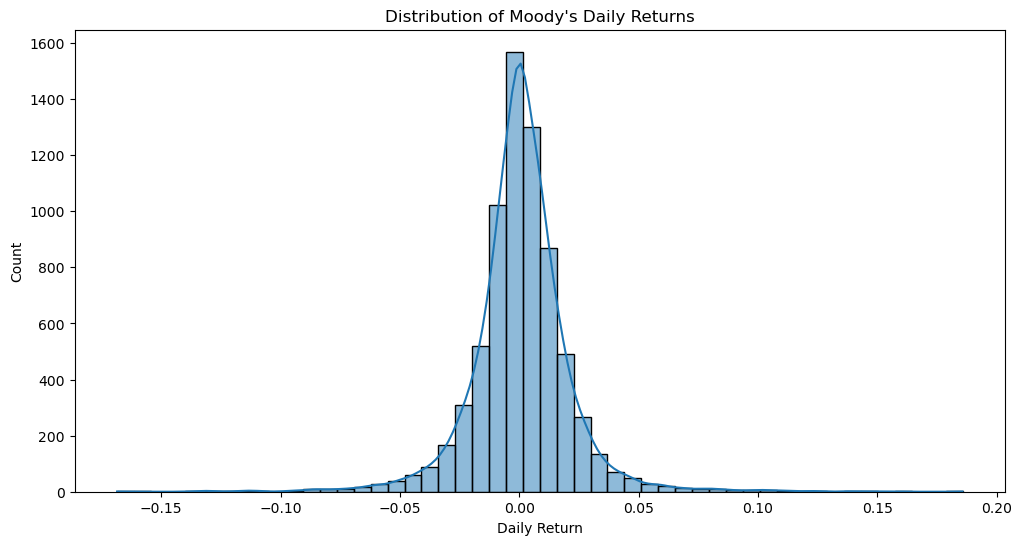

In [102]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'].dropna(), kde=True, bins=50)
plt.title('Distribution of Moody\'s Daily Returns')
plt.xlabel('Daily Return')
plt.show()


In [103]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()


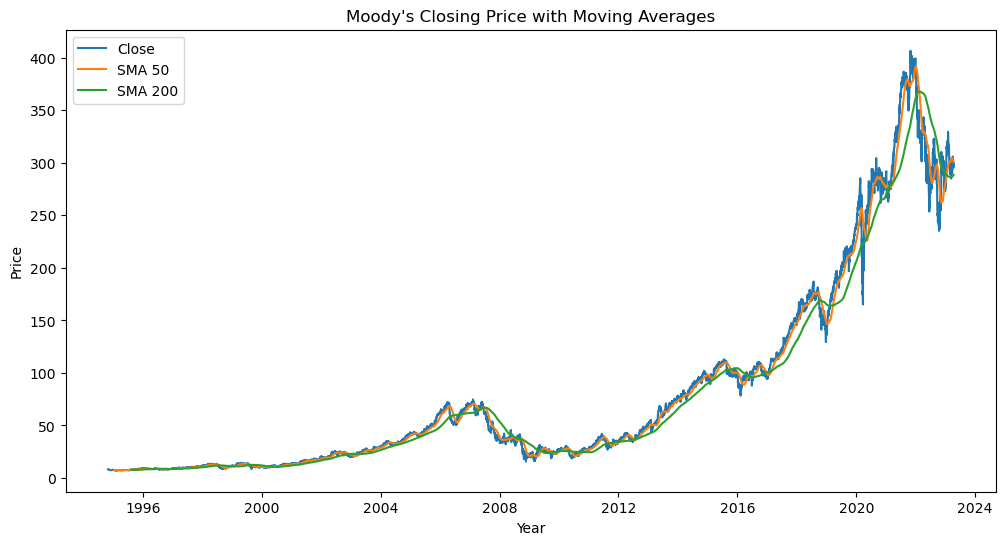

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close')
plt.plot(df['SMA_50'], label='SMA 50')
plt.plot(df['SMA_200'], label='SMA 200')
plt.title('Moody\'s Closing Price with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()



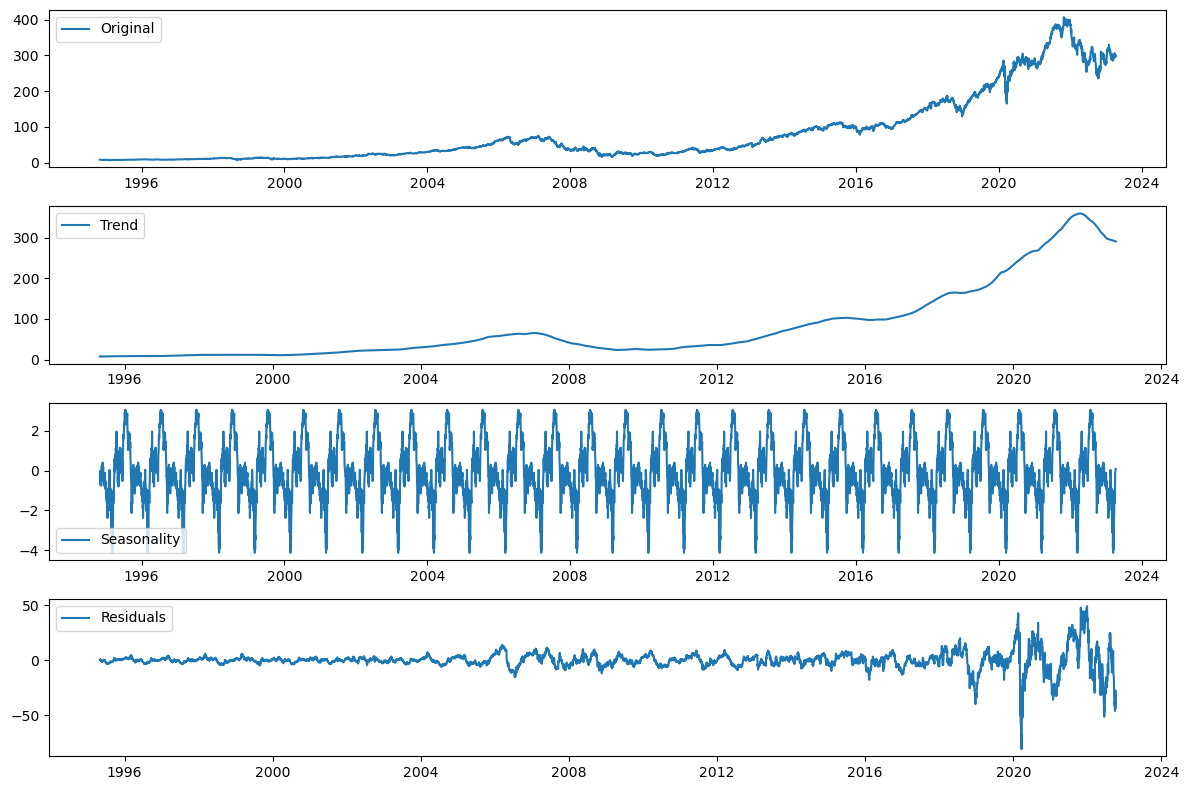

In [105]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()
